In [19]:
import pycomod as pcm
import numpy as np

In [9]:
class simple(pcm.Model):
    def build(self):
        self.P1 = pcm.Pool(20)
        self.P2 = pcm.Pool(20)
        
        self.a_v = pcm.Parameter([0.001, 0.005, 0.02])
        self.a_t = pcm.Parameter([0, 100, 200])
        
        self.a = pcm.Step(self.a_v, self.a_t)
        
        self.F1 = pcm.Flow(lambda: self.P1() * self.a(), src=self.P1, discrete=True)
        self.F2 = pcm.Flow(lambda: self.P2() * self.a(), src=self.P2)
        
        self.set_output('P1', 'P2')
        
m = simple()

In [8]:
m.write_excel_init()

In [20]:
mgr = pcm.RunManager()
#mgr.run(m, duration=300, label='My run')
mgr.run(m, init="init.xlsx", dt=1, tunit=np.timedelta64(1, 'D'), label='My run')


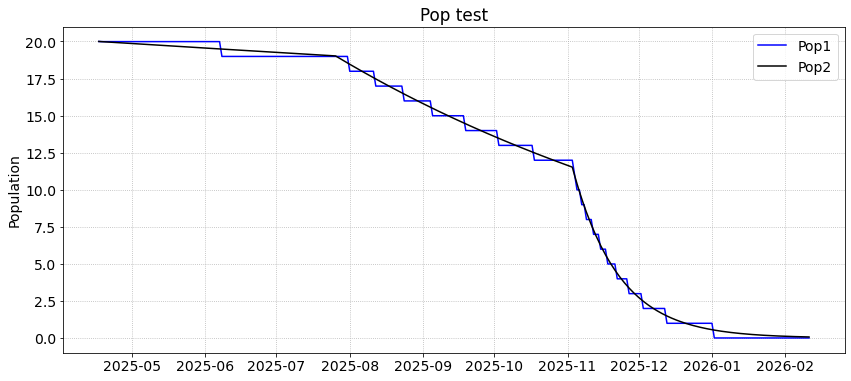

In [21]:
plt = pcm.Plotter(title='Pop test', ylabel='Population', fontsize=14)
plt.plot(mgr['My run'], 'P1', color='blue', label='Pop1')
plt.plot(mgr['My run'], 'P2', color='black', label='Pop2')